In [97]:
import numpy as np
from numpy.random import normal
import pandas as pd

_seed = 37
np.random.seed(_seed)

N = 1000

x0 = normal(1, 1, N)
x1 = normal(3 + 2 * x0, 1, N)
x2 = normal(2.5 + 0.8 * x1, N)
x3 = normal(5, 2, N)
x4 = normal(0.8 + 0.8 * x3, N)
x5 = normal(10, 5, N)

X0 = [x0, x1, x2, x3, x4, x5]
X0 = np.hstack([x.reshape(-1, 1) for x in X0])

x0 = normal(1.5, 1, N)
x1 = normal(7.3 + 2 * x0, 1, N)
x2 = normal(3.6 + 0.9 * x1, N)
x3 = normal(3.3, 2.5, N)
x4 = normal(0.9 - 0.4 * x3, N)
x5 = normal(10, 5, N)

X1 = [x0, x1, x2, x3, x4, x5]
X1 = np.hstack([x.reshape(-1, 1) for x in X1])

X = np.vstack([X0, X1])
y = np.hstack([np.full((1, X0.shape[0]), 0), np.full((1, X1.shape[0]), 1)])[0]
c = ['zero' if val == 0.0 else 'one' for val in y]

columns = ['X{}'.format(i) for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=columns)
X_df['y'] = c

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(random_state=_seed))])
pca.fit(X)
E = pca.transform(X)

E_df = pd.DataFrame(E, columns=columns)
E_df['y'] = c

print(X.shape)
print(E.shape)

(2000, 6)
(2000, 6)


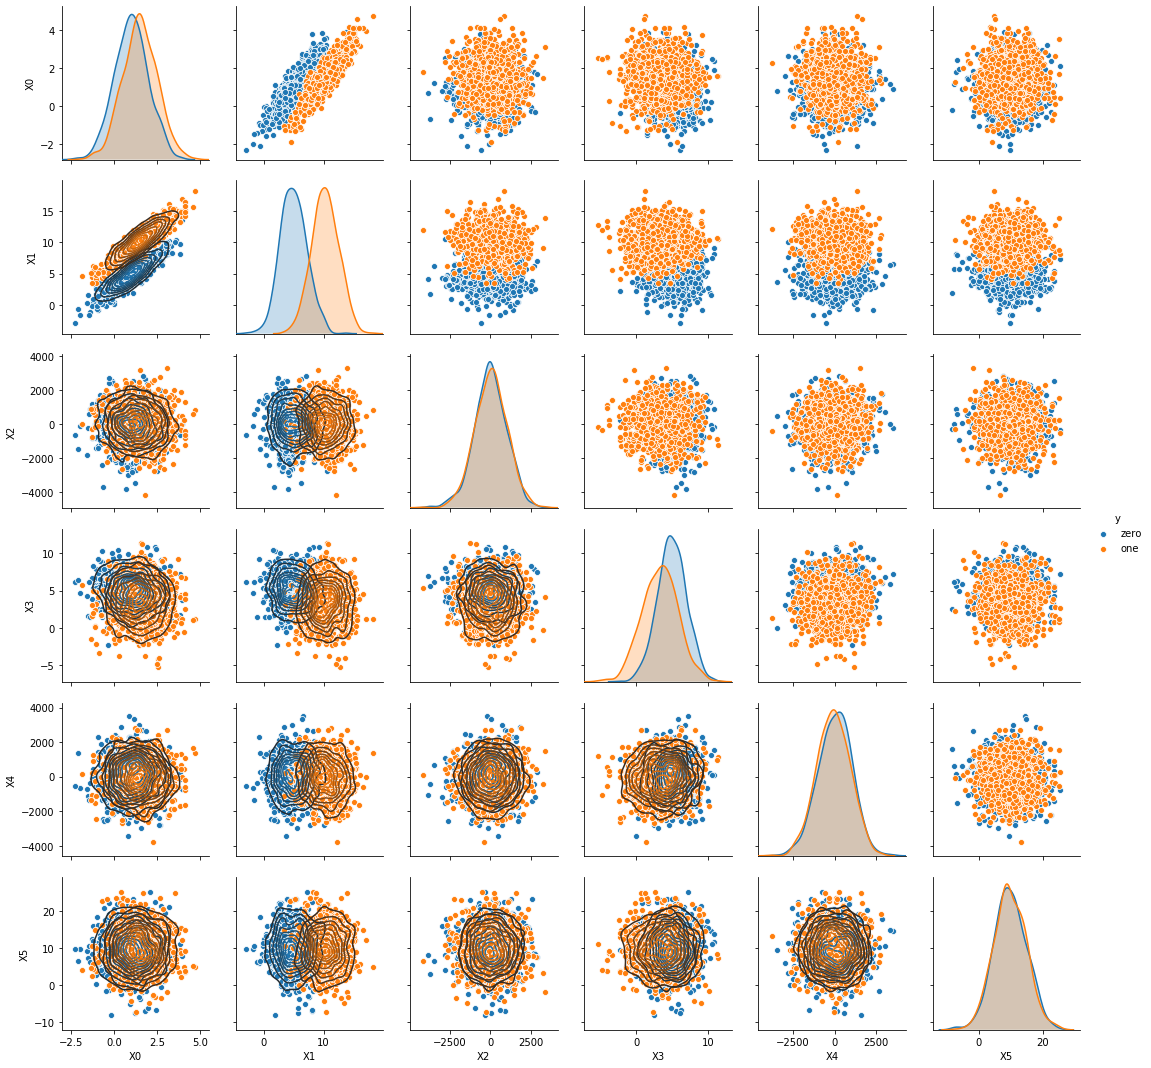

In [122]:
import seaborn as sns

g = sns.pairplot(X_df, hue='y')
g.map_lower(sns.kdeplot, **{'shade': False, 'n_levels': 10})

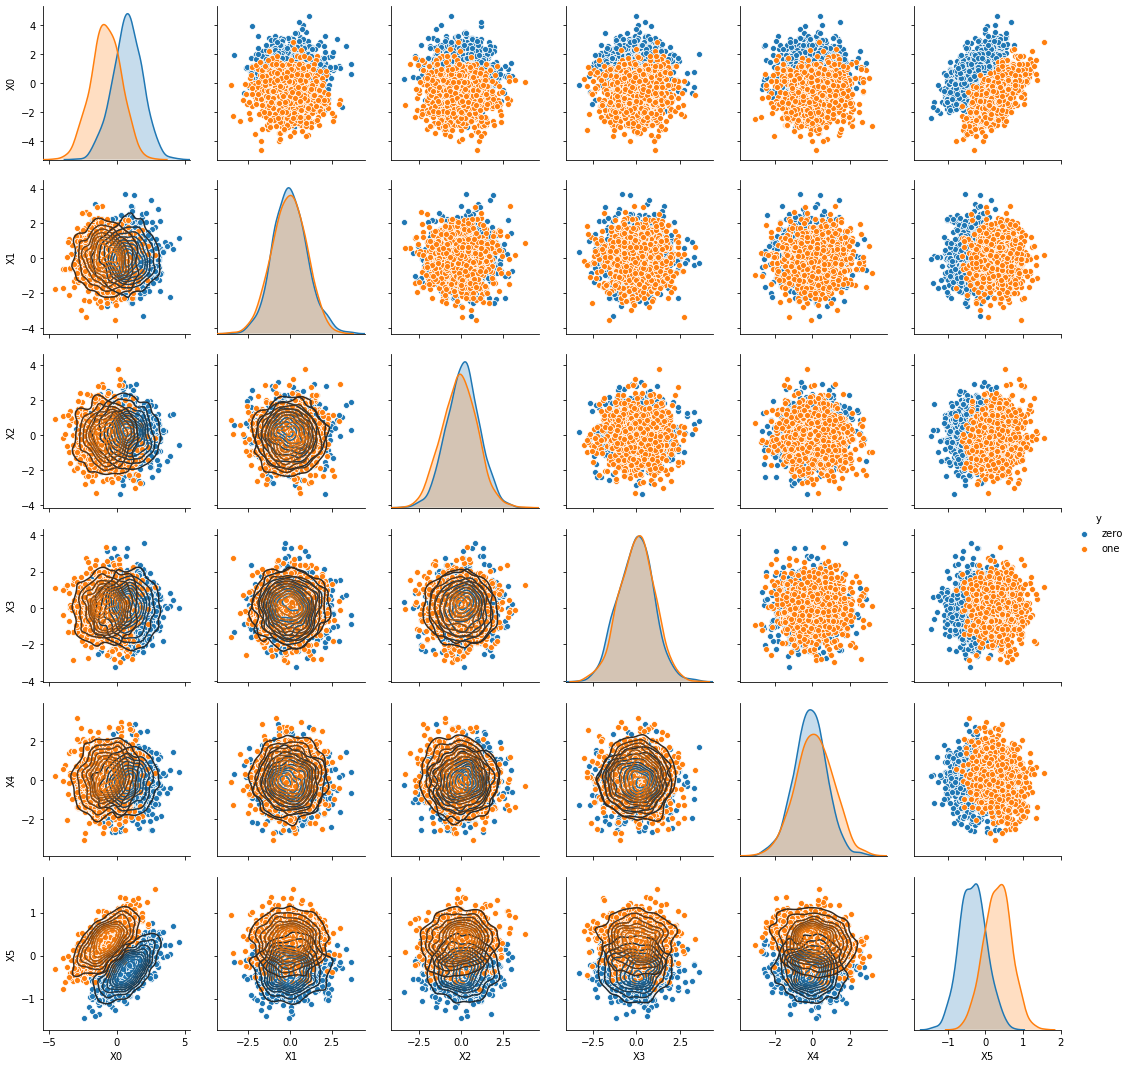

In [123]:
import seaborn as sns

g = sns.pairplot(E_df, hue='y')
g.map_lower(sns.kdeplot, **{'shade': False, 'n_levels': 10})

In [128]:
pca.steps[1][1]

PCA(copy=True, iterated_power='auto', n_components=None, random_state=37,
    svd_solver='auto', tol=0.0, whiten=False)

In [129]:
pca.steps[1][1].n_components_

6

In [130]:
pca.steps[1][1].components_

array([[-0.65128206, -0.6874503 ,  0.01227833,  0.30924032,  0.08638143,
        -0.00129515],
       [-0.05356882, -0.04691592, -0.72752126, -0.00116146, -0.67150973,
        -0.12130715],
       [ 0.23865249,  0.08269558, -0.52965836,  0.54570895,  0.57676333,
        -0.15878997],
       [-0.04258157, -0.00411843,  0.16374547, -0.11038623,  0.003393  ,
        -0.97936747],
       [-0.24259998, -0.05809644, -0.40394168, -0.75157892,  0.45700884,
         0.02955022],
       [-0.67478819,  0.71762125, -0.00652765,  0.17179879,  0.00940221,
         0.00589858]])

In [131]:
pca.steps[1][1].mean_

array([ 1.08113518e-15,  2.28556063e-15,  3.48332474e-18,  1.90827909e-15,
       -1.11299858e-17, -1.77002857e-15])

In [132]:
pca.steps[1][1].explained_variance_

array([1.83641746, 1.02530123, 1.01772535, 0.99979391, 0.88997952,
       0.23378403])

In [133]:
pca.steps[1][1].explained_variance_ratio_

array([0.30591654, 0.1707981 , 0.16953608, 0.166549  , 0.14825575,
       0.03894452])

In [134]:
pca.steps[1][1].explained_variance_ratio_.sum()

1.0

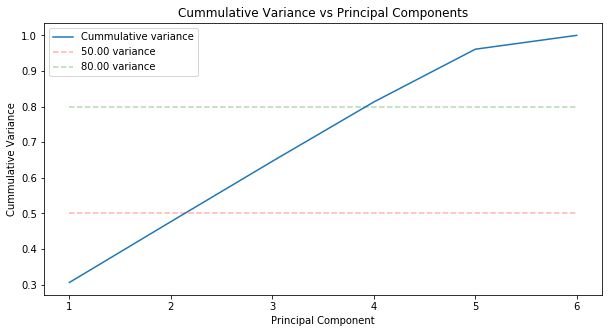

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt

y = [pca.steps[1][1].explained_variance_ratio_[:p+1].sum() for p in range(pca.steps[1][1].n_components_)]
x = [i + 1 for i in range(len(y))]

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, label='Cummulative variance')
for v, c in zip([0.5, 0.8], ['r--', 'g--']):
    ax.plot((1, len(y)), (v, v), c, alpha=0.3, label='{:.2f} variance'.format(v * 100.0))
ax.set_title('Cummulative Variance vs Principal Components')
ax.set_ylabel('Cummulative Variance')
ax.set_xlabel('Principal Component')
ax.legend()

In [136]:
pca.steps[1][1].singular_values_

array([60.58876555, 45.27225586, 45.10468895, 44.70557045, 42.17901206,
       21.61791584])

In [138]:
y

[0.3059165425776024,
 0.476714638457177,
 0.6462507189158533,
 0.8127997213736939,
 0.9610554762102181,
 1.0]

In [162]:
loadings = pca.steps[1][1].components_.T * np.sqrt(pca.steps[1][1].explained_variance_)
print(loadings.shape)
print(loadings)

(6, 6)
[[-0.88258151 -0.05424227  0.2407583  -0.04257718 -0.22886573 -0.32626832]
 [-0.93159471 -0.04750573  0.08342526 -0.00411801 -0.05480744  0.34697862]
 [ 0.01663892 -0.73666736 -0.53433193  0.1637286  -0.38107344 -0.0031562 ]
 [ 0.41906541 -0.00117606  0.55052415 -0.11037485 -0.70902998  0.08306681]
 [ 0.11705935 -0.67995167  0.58185254  0.00339265  0.43113632  0.00454608]
 [-0.00175512 -0.12283217 -0.16019109 -0.97926654  0.0278773   0.00285203]]


In [164]:
np.power(loadings, 2.0)

array([[7.78950116e-01, 2.94222364e-03, 5.79645592e-02, 1.81281659e-03,
        5.23795212e-02, 1.06451014e-01],
       [8.67868704e-01, 2.25679411e-03, 6.95977412e-03, 1.69579752e-05,
        3.00385574e-03, 1.20394164e-01],
       [2.76853538e-04, 5.42678805e-01, 2.85510613e-01, 2.68070544e-02,
        1.45216963e-01, 9.96159970e-06],
       [1.75615820e-01, 1.38312184e-06, 3.03076835e-01, 1.21826075e-02,
        5.02723511e-01, 6.90009479e-03],
       [1.37028903e-02, 4.62334278e-01, 3.38552380e-01, 1.15100724e-05,
        1.85878524e-01, 2.06668879e-05],
       [3.08043185e-06, 1.50877419e-02, 2.56611847e-02, 9.58962965e-01,
        7.77143877e-04, 8.13410308e-06]])

In [170]:
np.power(loadings, 2.0).sum(axis=1)

array([1.00050025, 1.00050025, 1.00050025, 1.00050025, 1.00050025,
       1.00050025])

In [171]:
np.sqrt(np.power(loadings, 2.0).sum(axis=0))

array([1.35514481, 1.01257159, 1.00882374, 0.99989695, 0.94338726,
       0.48351219])